# Import and Install Dependencies

In [1]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
# len(results.left_hand_landmarks.landmark)

In [15]:
results


mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

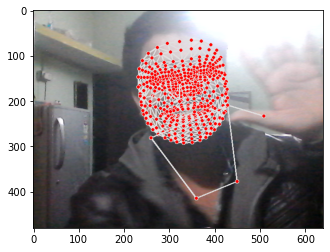

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [20]:
len(results.pose_landmarks.landmark)

33

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.50554973,  0.41998994, -1.34688175, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
np.save('0', result_test)

In [29]:
468*3+33*4+21*3+21*3

1662

In [30]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 0.50554973,  0.41998994, -1.34688175, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [32]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [36]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [35]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features


In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [38]:
label_map = {label:num for num, label in enumerate(actions)}

In [39]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [135]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [136]:
np.array(sequences).shape

(90, 30, 1662)

In [137]:
np.array(labels).shape

(90,)

In [138]:
X = np.array(sequences)

In [139]:
X.shape

(90, 30, 1662)

In [140]:
y = to_categorical(labels).astype(int)

In [141]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [143]:
y_test.shape

(5, 3)

# Build and Train LSTM Neural Network

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [151]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [197]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [153]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


### Why We Use LSTM?

##### - Less Data Required
##### - Faster to Train
##### - Faster Detection


In [154]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])


Epoch 1/300
3/3 [==============================] - 10s 3s/step - loss: 1.3461 - categorical_accuracy: 0.3015
Epoch 2/300
3/3 [==============================] - 0s 115ms/step - loss: 1.4974 - categorical_accuracy: 0.2193
Epoch 3/300
3/3 [==============================] - 0s 86ms/step - loss: 0.9374 - categorical_accuracy: 0.4227
Epoch 4/300
3/3 [==============================] - 0s 87ms/step - loss: 6.2201 - categorical_accuracy: 0.3562
Epoch 5/300
3/3 [==============================] - 0s 85ms/step - loss: 2.9567 - categorical_accuracy: 0.2779
Epoch 6/300
3/3 [==============================] - 0s 87ms/step - loss: 7.3485 - categorical_accuracy: 0.2583
Epoch 7/300
3/3 [==============================] - 0s 85ms/step - loss: 9.2143 - categorical_accuracy: 0.3072
Epoch 8/300
3/3 [==============================] - 0s 86ms/step - loss: 13.8330 - categorical_accuracy: 0.3405
Epoch 9/300
3/3 [==============================] - 0s 85ms/step - loss: 37.9690 - categorical_accuracy: 0.3503
Epoch 10

3/3 [==============================] - 0s 124ms/step - loss: 0.7678 - categorical_accuracy: 0.6223
Epoch 75/300
3/3 [==============================] - 0s 120ms/step - loss: 0.7819 - categorical_accuracy: 0.7142
Epoch 76/300
3/3 [==============================] - 0s 117ms/step - loss: 0.7780 - categorical_accuracy: 0.6203
Epoch 77/300
3/3 [==============================] - 0s 148ms/step - loss: 0.7285 - categorical_accuracy: 0.6007
Epoch 78/300
3/3 [==============================] - 0s 136ms/step - loss: 0.7754 - categorical_accuracy: 0.6790
Epoch 79/300
3/3 [==============================] - 0s 113ms/step - loss: 0.7624 - categorical_accuracy: 0.6223
Epoch 80/300
3/3 [==============================] - 0s 176ms/step - loss: 0.7340 - categorical_accuracy: 0.6634
Epoch 81/300
3/3 [==============================] - 0s 147ms/step - loss: 0.7809 - categorical_accuracy: 0.6144
Epoch 82/300
3/3 [==============================] - 0s 126ms/step - loss: 0.6958 - categorical_accuracy: 0.6672
Epoch

3/3 [==============================] - 0s 102ms/step - loss: 0.4523 - categorical_accuracy: 0.7808
Epoch 147/300
3/3 [==============================] - 0s 104ms/step - loss: 0.9179 - categorical_accuracy: 0.6262
Epoch 148/300
3/3 [==============================] - 0s 118ms/step - loss: 1.8891 - categorical_accuracy: 0.5577
Epoch 149/300
3/3 [==============================] - 0s 99ms/step - loss: 1.2581 - categorical_accuracy: 0.6438
Epoch 150/300
3/3 [==============================] - 0s 106ms/step - loss: 1.2542 - categorical_accuracy: 0.6224
Epoch 151/300
3/3 [==============================] - 0s 111ms/step - loss: 0.5642 - categorical_accuracy: 0.7808
Epoch 152/300
3/3 [==============================] - 0s 102ms/step - loss: 0.6725 - categorical_accuracy: 0.7084
Epoch 153/300
3/3 [==============================] - 0s 135ms/step - loss: 0.5206 - categorical_accuracy: 0.7945
Epoch 154/300
3/3 [==============================] - 0s 116ms/step - loss: 0.5289 - categorical_accuracy: 0.839

3/3 [==============================] - 0s 132ms/step - loss: 0.1965 - categorical_accuracy: 0.9022
Epoch 219/300
3/3 [==============================] - 0s 134ms/step - loss: 0.1954 - categorical_accuracy: 0.9119
Epoch 220/300
3/3 [==============================] - 0s 119ms/step - loss: 0.1762 - categorical_accuracy: 0.9237
Epoch 221/300
3/3 [==============================] - 0s 144ms/step - loss: 0.1924 - categorical_accuracy: 0.9608
Epoch 222/300
3/3 [==============================] - 0s 150ms/step - loss: 0.2118 - categorical_accuracy: 0.9159
Epoch 223/300
3/3 [==============================] - 0s 175ms/step - loss: 0.1835 - categorical_accuracy: 0.9374
Epoch 224/300
3/3 [==============================] - 0s 159ms/step - loss: 0.1601 - categorical_accuracy: 0.9569
Epoch 225/300
3/3 [==============================] - 0s 141ms/step - loss: 0.1616 - categorical_accuracy: 0.9569
Epoch 226/300
3/3 [==============================] - 1s 187ms/step - loss: 0.1572 - categorical_accuracy: 0.93

KeyboardInterrupt: 

In [191]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_31 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_32 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_______________________________________________

# Make Predictions

In [192]:
res = model.predict(X_test)

In [193]:
actions[np.argmax(res[0])]

'iloveyou'

In [194]:
actions[np.argmax(y_test[0])]

'hello'

# Save Weights

In [195]:
model.save('action.h5')

In [196]:
del model

In [198]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [199]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [200]:
yhat = model.predict(X_train)

In [201]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [202]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  4],
        [ 2, 26]],

       [[57,  1],
        [ 2, 25]],

       [[51,  4],
        [ 5, 25]]], dtype=int64)

In [203]:
accuracy_score(ytrue, yhat)


0.8941176470588236

# Test in Real Time

In [204]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [205]:
X_test[0].shape

(30, 1662)

In [206]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.42581674, 0.02344566, 0.5507377 ]], dtype=float32)

In [207]:
sequence.reverse()
sequence[-30:]


[array([ 0.39585727,  0.39404747, -1.13353848, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.39427406,  0.39888194, -1.11217785, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.38436025,  0.40477455, -1.04427135, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.37724444,  0.42225835, -1.03368974, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.37797973,  0.44249362, -1.19057024, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.3705661 ,  0.44734076, -1.09209049, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.36880839,  0.44816622, -1.43780124, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.37726682,  0.4458985 , -1.3809917 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.38807476,  0.4347097 , -1.47705591, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.40946579,  0.42160311, -1.66237223, ...,  0.        ,
         0.        ,  0.  

In [218]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

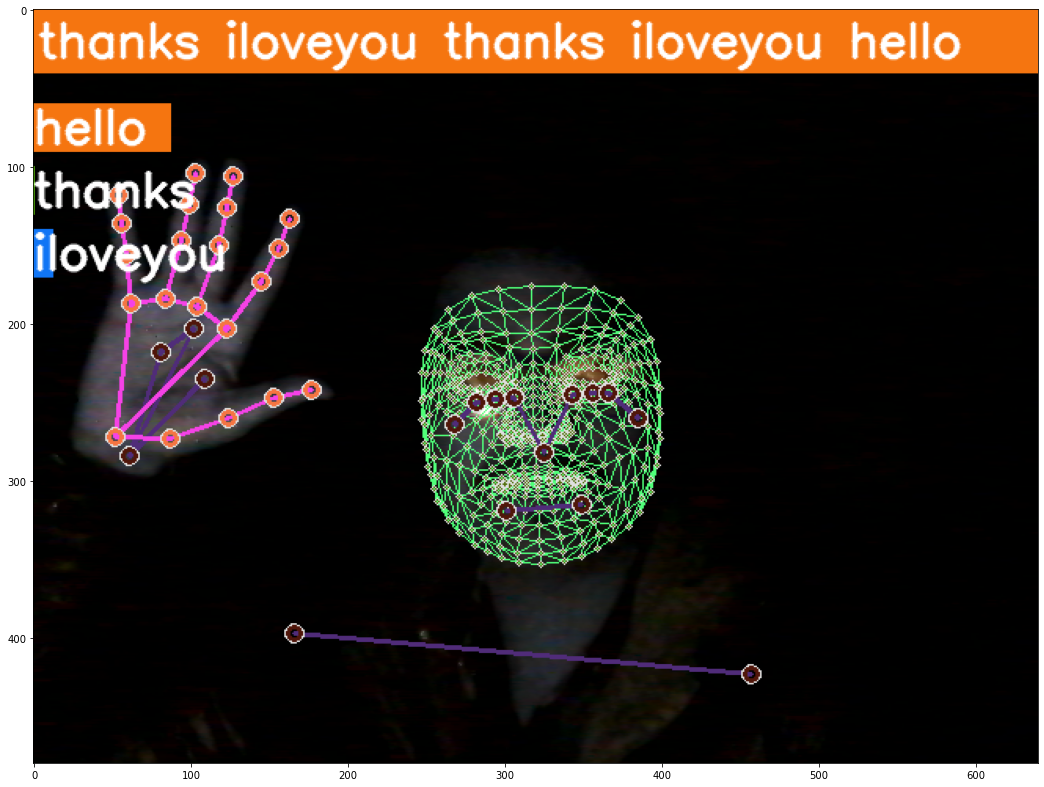

In [219]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [220]:
res[np.argmax(res)] > threshold

True

In [221]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.42581674, 0.02344566, 0.5507377 ]], dtype=float32)